<a href="https://colab.research.google.com/github/mygoal-javadeveloper/InterviewTasks/blob/main/RedCarpetUp_InterviewQuestion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RedCarpetUp_InterviewQuestion 2
# Name: Nisrin Dhoondia
## Mobile: +91-7045194214 
## Email: nisrin.dhoondia@gmail.com
## GitHub: https://github.com/mygoal-javadeveloper
## Kaggle: https://www.kaggle.com/nisrindhoondia
## My Portfolio (Github and others): https://linktr.ee/nisrindhoondia



# RedCarpetUp_InterviewQuestion 2 Solution
 
# Loading the dataset, Analyzing the data and data preprocessing

In [ ]:
!pip install xgboost

In [ ]:
#import libraries 
import numpy as np
import pandas as pd

In [ ]:
#uploading csv file for accessing it in this notebook
from google.colab import files
uploaded = files.upload()

Saving sample_data.csv to sample_data.csv


In [ ]:
#reading csv file and assigning to dataset variable
dataset = pd.read_csv('sample_data.csv')

In [ ]:
#getting the overview of all the columns in the dataset
dataset.columns

Index(['user_id', 'target', 'f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6',
       'f_7',
       ...
       'f_230', 'f_231', 'f_232', 'f_233', 'f_234', 'f_235', 'f_236', 'f_237',
       'f_238', 'f_239'],
      dtype='object', length=242)

In [ ]:
#getting brief overview of the dataset - number of columns and rows (shape of dataset), columns names and its dtype, how many non-null values it has and memory usage.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62641 entries, 0 to 62640
Columns: 242 entries, user_id to f_239
dtypes: float64(149), int64(93)
memory usage: 115.7 MB


In [ ]:
#setting the output display range
pd.options.display.max_columns = 250
pd.options.display.max_rows = 62641

In [ ]:
#first 5 rows content of the dataset
dataset.head()

,user_id,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_150,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239
0,150,0.0,496.25,16521.00,1,1873.0,0.0,13,0.0,578,1770.0,9269.98,2728.498333,32741.98,2728.498333,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,100.0,22.222222,0.0,0.0,0.000000,2.0,2.0,2.0,NaN,547.0,36.0,551.0,549.0,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,0.0,20000.0,1666.666667,20000.00,0.00,200.66,16.721667,0.0,833.34,69.445000,0.0,10000.0,833.333333,0.0,10000.0,1178.096774,217.0,255647.00,0.0,19500.0,1392.857143,14.0,19500.0,0.0,23999.0,4922.923077,13.0,63998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,3.0,4.0,1.0,45835.22,1992.835652,0.0,12390.0,3.53,-1.0,NaN,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,340,0.0,0.00,8.00,1,8.0,0.0,29,0.0,1308,148.0,5638.00,1273.357143,35654.00,1273.357143,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0,NaN,1.0,2.0,741.0,13.0,649.0,637.0,260.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,25.0,0.0,3363.0,1051.418571,29439.72,-50.46,912.83,73.911071,0.0,140.13,41.196071,0.0,312.0,16.027143,0.0,2940.0,392.490667,105.0,41211.52,0.0,7225.0,352.586207,29.0,10225.0,0.0,5966.0,325.500000,30.0,9765.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,3.0,10.0,1.0,31016.64,756.503415,0.0,3363.0,1.93,0.0,NaN,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,575,0.0,0.00,12159.00,1,12159.0,0.0,18,0.0,670,2000.0,22500.00,9292.941176,157980.00,9292.941176,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,2.0,2.0,1.0,NaN,515.0,1.0,593.0,592.0,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,21.0,0.0,24499.5,8173.794118,138954.50,-152.50,3248.08,417.166471,0.0,872.92,304.010000,0.0,7000.0,546.764706,0.0,9985.0,2190.050725,69.0,151113.50,0.0,22500.0,1824.157895,19.0,34659.0,0.0,30000.0,2726.850000,20.0,54537.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
#finding the dtype of target variable
dataset['target'].dtype

dtype('float64')

In [ ]:
#target column (dependent variable) all unique values count. 
dataset['target'].value_counts(dropna = False).to_frame()

,target
0.0,62481
1.0,160


In [ ]:
#target column (dependent variable) is a Binary Classification.
#converting it into int8
dataset['target'] = dataset['target'].astype('int8')

In [ ]:
#rechecking the dtype of target variable
dataset['target'].dtype

dtype('int8')

In [ ]:
#target column (dependent variable) all unique values count. 
dataset['target'].value_counts().to_frame()

,target
0,62481
1,160


The dataset is very much imbalance

In [ ]:
round(dataset['target'].value_counts(normalize = True)* 100, 2).to_frame()

,target
0,99.74
1,0.26


In [ ]:
#import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

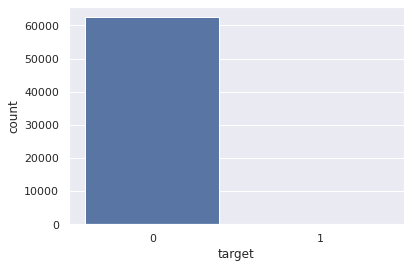

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x='target',  data=dataset)
plt.show()

In [ ]:
#overview of all column names having dtype object
list(dataset.select_dtypes(['object']).columns)

[]

In [ ]:
#checking the number of null values in each columns
nullvalues_dict = {}
for col in dataset.columns:
  if dataset[col].isnull().sum() > 0:
    nullvalues_dict[col] = dataset[col].isnull().sum()
pd.Series(nullvalues_dict).to_frame()

,0
f_8,2834
f_9,2834
f_10,2834
f_11,2834
f_12,2834
f_13,2834
f_14,2834
f_15,2834
f_16,2834
f_17,2834


In [ ]:
#checking the number of columns having the null values
len(nullvalues_dict)

132

In [ ]:
#dropping the columns

In [ ]:
#dropping user_id column as it has no significance for the target variable
dataset.drop('user_id', axis = 1, inplace = True)

In [ ]:
#dropping all the columns having 80 percent missing values in its datapoint
#we can use dropna too by giving number of non-NA values to the thresh parameters
dropcol = []
for col, missingval in nullvalues_dict.items():
  if round(missingval * 100 / len(dataset), 2) >= 80:
    dataset.drop(col, axis = 1, inplace = True)
    dropcol.append(col) #creating a list of columns dropped
    

In [ ]:
#checking the number of columns having the null values after dropping 80 percent missing values columns
for x in dropcol:
  del nullvalues_dict[x]
len(nullvalues_dict)

117

In [ ]:
dataset.shape[1] 

226

In [ ]:
#finding the percentage of number of columns having null values
len(nullvalues_dict) * 100 / (dataset.shape[1] - 1) #minus one for target column

52.0

In [ ]:
#52 is a big percent of filling the null values in a row which may have 117 values null in its datapoint
#we can opt for deleting such rows using dropna having 180 non-NA in thresh 
#but since our dataset is extremely imbalance we restrain from deleting rows

In [ ]:
#filling the null values with mean
for col, missingval in nullvalues_dict.items():
  meanval = dataset[col].mean()
  dataset[col].fillna(meanval, inplace = True)

In [ ]:
#checking for null values in dataset
dataset.isnull().sum().sum()

0

In [ ]:
#checking for duplicates values
dataset.duplicated().sum()

0

In [ ]:
# Basic Statistical details 
dataset.describe()

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239
count,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.0,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,6.264100e+04,62641.000000,62641.000000,6.264100e+04,6.264100e+04,6.264100e+04,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,6.264100e+04,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.0,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,6.264100e+04,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,6.264100e+04,6.264100e+04,62641.000000,6.264100e+04,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.0,62641.0,62641.0,62641.0,62641.0,62641.0,62641.000000,62641.0,62641.0,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,6.264100e+04,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.0,62641.0,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.000000,62641.0000

In [ ]:
#the above output shows some columns are having 0 min and 0 max values
#let us find and delete this columns

In [ ]:
#finding the unique values count and dtypes of each columns
print('Unique Value Count: \n')
for x in dataset.columns:
  print(x + ' = ' + str(len(dataset[x].unique())) + ' '+'['+ str(dataset[x].dtype) +']')
  print()

Unique Value Count: 

target = 2 [int8]

f_0 = 30952 [float64]

f_1 = 36683 [float64]

f_2 = 8 [int64]

f_3 = 8519 [float64]

f_4 = 11 [float64]

f_5 = 41 [int64]

f_6 = 18 [float64]

f_7 = 44 [int64]

f_8 = 3818 [float64]

f_9 = 23987 [float64]

f_10 = 44296 [float64]

f_11 = 42301 [float64]

f_12 = 45844 [float64]

f_13 = 1 [float64]

f_14 = 12 [float64]

f_15 = 353 [float64]

f_16 = 41 [float64]

f_17 = 9 [float64]

f_18 = 9 [float64]

f_19 = 32 [float64]

f_20 = 194 [float64]

f_21 = 365 [float64]

f_22 = 3 [float64]

f_23 = 5 [float64]

f_24 = 9 [float64]

f_25 = 27 [float64]

f_26 = 222 [float64]

f_27 = 521 [float64]

f_28 = 3 [float64]

f_29 = 6 [float64]

f_30 = 14 [float64]

f_31 = 23 [float64]

f_32 = 237 [float64]

f_33 = 681 [float64]

f_34 = 3 [float64]

f_35 = 7 [float64]

f_36 = 22 [float64]

f_37 = 20 [float64]

f_38 = 288 [float64]

f_39 = 825 [float64]

f_40 = 3 [float64]

f_41 = 8 [float64]

f_42 = 30 [float64]

f_43 = 15 [float64]

f_44 = 248 [float64]

f_45 = 1352

In [ ]:
#the above two code output shows that there are columns having only zero values in its entire datapoints
#finding and dropping the columns entirely with zero values
for col in dataset.columns:
  if (dataset[col].min() == 0) & (dataset[col].max() == 0):
    print(col)
    dataset.drop(col, axis = 1, inplace = True)

f_13
f_115
f_116
f_118
f_119
f_120
f_122
f_123
f_168
f_169


In [ ]:
#scaling each feature individually to a given range between zero and one.
from sklearn.preprocessing import MinMaxScaler
minmax_dataset = dataset.drop('target', axis = 1)
col_name = dataset.drop(['target'], axis = 1).columns[:]

minmax_scaler = MinMaxScaler()
minmax_dataset = minmax_scaler.fit_transform(minmax_dataset)
minmax_dataset = pd.DataFrame(minmax_dataset, columns = col_name)
minmax_dataset['target'] = dataset['target']
minmax_dataset.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_117,f_121,f_124,f_125,f_126,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239,target
0,0.019281,0.228015,0.0,0.032137,0.0,0.266667,0.000000,0.359632,0.058973,0.156561,0.090354,0.078104,0.090384,0.000000,0.000000,0.250000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.030864,0.027933,0.0,0.000000,0.000000,0.5,0.250000,0.1,0.305246,0.050432,0.696587,0.499545,0.501597,0.000148,0.092634,0.160454,0.006018,0.005367,0.005364,0.017616,0.06505,0.049249,0.114791,0.114882,0.114829,0.003179,0.019416,0.003697,0.016302,0.044871,0.034875,0.0,0.280000,0.0,0.266117,0.027778,0.070168,0.368690,0.007089,0.025563,0.0,0.216752,0.027776,0.0,0.112029,0.025760,0.0,0.529381,0.117810,0.016545,0.053131,0.006293,0.650000,0.046429,0.117117,0.043339,0.0,2.542064e-06,8.864557e-06,0.075472,6.778779e-06,0.0021,0.001951,0.005716,0.003362,0.001283,0.000790,0.008031,0.001716,0.005570,0.0,0.018921,0.000437,0.000819,0.00062,0.075,0.75,0.014493,0.25,0.021629,0.152481,0.000000,0.216340,0.141313,0.062500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000000,0.000134,0.0,0.000120,0.0,0.622222,0.000000,0.839579,0.004908,0.095214,0.042149,0.085050,0.042181,0.000000,0.000000,0.613636,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.318415,0.0,0.413504,0.017291,0.820480,0.579618,0.833866,0.000148,0.092634,0.160454,0.006018,0.005367,0.005364,0.017616,0.06505,0.049249,0.114791,0.114882,0.114829,0.003179,0.019416,0.003697,0.016302,0.044871,0.034875,0.0,0.320000,0.0,0.044748,0.017524,0.103286,0.345935,0.032249,0.038162,0.0,0.036448,0.016477,0.0,0.003495,0.000495,0.0,0.155638,0.039249,0.007966,0.008565,0.006293,0.240833,0.011753,0.252252,0.022725,0.0,6.319410e-07,5.861179e-07,0.182390,1.034326e-06,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.017857,0.000000,0.000000,0.00000,0.180,0.75,0.036232,0.25,0.014636,0.057884,0.000000,0.058721,0.077262,0.083333,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.000000,0.167819,0.0,0.208720,0.0,0.377778,0.000000,0.420118,0.

# Correlation and Visualization of the correlation matrix

In [ ]:
minmax_dataset.groupby('target').mean()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_117,f_121,f_124,f_125,f_126,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.064813,0.149479,0.001746,0.032505,0.000108,0.199467,0.050155,0.195466,0.030221,0.100387,0.082110,0.049348,0.075209,0.072960,0.061470,0.190976,0.018651,0.022360,0.00633,0.045804,0.038259,0.17029,0.210312,0.196573,0.004193,0.059647,0.036774,0.144537,0.180391,0.167835,0.003158,0.062220,0.037481,0.126596,0.153627,0.142932,0.002879,0.079748,0.045535,0.10639,0.12987,0.118915,0.001553,0.047825,0.053124,0.036412,0.088292,0.068603,0.284292,0.318506,0.013323,0.010818,0.009770,0.097551,0.068357,0.569673,0.000148,0.092655,0.160498,0.006015,0.005368,0.005364,0.017609,0.065058,0.049249,0.114763,0.114855,0.114801,0.003179,0.019416,0.003697,0.016303,0.044878,0.034877,0.0,0.324393,0.011035,0.176818,0.06315,0.094295,0.367407,0.022903,0.054469,0.012813,0.169845,0.079211,0.000977,0.012107,0.006524,0.003868,0.340867,0.132511,0.003096,0.008707,0.021955,0.472517,0.105581,0.086154,0.053797,0.00005,0.000019,0.000020,0.058918,0.000020,0.002091,0.001946,0.005698,0.003351,0.001278,0.000789,0.008013,0.001707,0.005557,0.0,0.018921,0.000428,0.000815,0.000618,0.070359,0.425665,0.015470,0.033542,0.013536,0.104406,0.024318,0.097762,0.005100,0.149457,0.066868,0.933036,0.032746,0.084874,0.459644,0.422737,0.252637,0.747363,0.949857,0.020502,0.029337,0.000032,0.000128,0.494614,0.160945,0.144508,0.199357,0.34721,0.029097,0.081753,0.303772,0.215634,0.008227,0.01418,0.023799,0.012404,0.011684,0.0125,0.007938,0.005218,0.003505,0.008931,0.0016,0.002241,0.005442,0.007458,0.004289,0.021174,0.001376,0.003105,0.013316,0.022391,0.128887,0.002657,0.279957,0.001392,0.000176,0.069381,0.00016,0.000608,0.000032,0.080056,0.004001,0.028617,0.037275,0.000048,0.007554,0.079384,0.063139,0.000864,0.184088,0.013444,0.000544,0.108241,0.029273,0.000352,0.001809,0.00056,0.000544,0.004833,0.000784,0.015541,0.000176,0.006162,0.00128,0.076151,0.004994,0.003889,0.000352,0.000592,0.036715,0.00016,0.001056,0.001873,0.00136,0.039628,0.030089
1,0.166933,0.122743,0.050000,0.037751,0.003720,0.295278,0.056548,0.276611,0.032187,0.124405,0.095673,0.083628,0.087846,0.097727,0.049746,0.279261,0.005556,0.010417,0.04375,0.098016,0.109060,0.21250,0.320833,0.294792,0.032500,0.116245,0.097035,0.168750,0.253125,0.232500,0.025000,0.115382,0.092847,0.137500,0.207500,0.183333,0.017308,0.149100,0.108060,0.08125,0.17500,0.142262,0.003125,0.083740,0.102139,0.018750,0.119444,0.071843,0.306679,0.282960,0.014375,0.006798,0.014652,0.099496,0.070053,0.566943,0.000131,0.084154,0.143406,0.007317,0.005008,0.005415,0.020186,0.061712,0.049182,0.125511,0.125592,0.125545,0.002976,0.019631,0.003532,0.015895,0.042196,0.034206,0.0,0.300917,0.000734

In [ ]:
# Creating the same table as above but now the pivot table of median of each columns
colname = list(minmax_dataset.columns).remove('target')
minmax_dataset.pivot_table(colname, ['target'], aggfunc=np.median) #mean is default

,f_0,f_1,f_10,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_11,f_110,f_111,f_112,f_113,f_114,f_117,f_12,f_121,f_124,f_125,f_126,f_14,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_15,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_16,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_17,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_18,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_19,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_2,f_20,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_21,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_22,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_23,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239,f_24,f_25,f_26,f_27,f_28,f_29,f_3,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_4,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_5,f_50,f_51,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_6,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_7,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_8,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_9,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.050433,0.082824,0.058256,0.04445,0.0,0.000000,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.0,0.030172,0.0,0.0,0.0,0.0,0.0,0.0,0.051603,0.017857,0.0,0.0,0.0,0.000000,0.055,0.5,0.01087,0.0,0.006980,0.084296,0.0,0.062719,0.0,0.149409,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.191202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00,0.019451,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.078947,0.023952,0.0,0.0,0.000000,0.000000,0.0,0.037037,0.025140,0.0,0.000000,0.000000,0.5,0.200000,0.25,0.0,0.000558,0.001441,0.006321,0.00364,0.569666,0.000148,0.092634,0.0,0.160454,0.006018,0.005367,0.005364,0.017616,0.06505,0.049249,0.114791,0.114882,0.114829,0.200526,0.003179,0.019416,0.003697,0.016302,0.044871,0.034875,0.0,0.293333,0.0,0.133058,0.021741,0.038873,0.075781,0.36869,0.015691,0.038827,0.0,0.134537,0.045929,0.0,0.000008,0.061104,0.000002,0.0,0.370566,0.099804,0.001379,0.004913,0.006293,0.333333,0.056923,0.090090
1,0.159557,0.085315,0.074316,0.04145,0.0,0.000001,0.000003,0.088050,0.000003,0.0,0.0,0.0,0.0,0.064342,0.0,0.0,0.0,0.0,0.0,0.0,0.069894,0.017857,0.0,0.0,0.0,0.090909,0.120,0.5,0.01087,0.0,0.014243,0.091624,0.0,0.087304,0.0,0.083333,0.027548,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.272727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.090909,0.071642,0.0,0.25,0.029511,0.1,0.0,0.078947,0.080178,0.0,0.2,0.133333,0.0,0.144737,0.095808,0.0,0.0,0.166667,0.095238,0.0,0.074074,0.083799,0.0,0.111111,0.044444,0.5,0.288889,0.25,0.0,0.000558,0.002882,0.006321,0.00364,0.569666,0.000148,0.092634,0.0,0.160454,0.006018,0.005367,0.005364,0.017616,0.06505,0.049249,0.114791,0.114882,0.114829,0.269231,0.003179,0.019416,0.003697,0.016302,0.044871,0.034875,0.0,0.280000,0.0,0.133058,0.026441,0.024385,0.072559,0.36869,0.014293,0.029863,0.0,0.151000,0.034489,0.0,0.000006,0.097978,0.000001,0.0,0.370566,0.078444,0.001762,0.004298,0.006293,0.333333,0.039566,0.117117


In [ ]:
minmax_dataset.corr()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_117,f_121,f_124,f_125,f_126,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239,target
f_0,1.000000,0.193483,0.322903,-0.041625,8.256342e-02,0.223301,0.212400,0.157039,0.103802,-0.014710,0.052235,0.083017,-0.021852,0.229385,0.184641,0.150683,0.097133,0.144764,0.056555,0.135271,0.137246,0.185623,0.229305,0.222096,0.052608,0.139905,0.142697,0.168844,0.225685,0.212543,0.048272,1.429030e-01,0.150813,0.162169,0.226654,0.211357,0.045268,0.171850,0.173986,0.157431,0.227431,0.212390,0.027457,0.197506,0.204083,0.128898,0.228930,0.211752,1.019500e-02,2.232172e-02,0.004682,0.001738,7.512211e-04,-6.945057e-02,-7.283533e-02,-7.221343e-03,1.945736e-03,5.377789e-02,3.014876e-02,-9.116116e-03,1.473359e-02,-1.962610e-03,-2.755135e-02,2.131853e-02,-4.927740e-03,3.468595e-02,3.411099e-02,3.454465e-02,1.975080e-02,3.083675e-02,8.856329e-03,2.669432e-02,4.289997e-02,4.250530e-02,NaN,-0.031120,-0.097538,0.319304,0.109235,0.145030,-0.122812,0.063220,0.021808,-0.107466,0.296781,0.081270,-0.035535,-0.032775,-0.053597,-0.102591,0.294077,0.107499,-0.069836,-0.062568,-0.146430,0.225627,-0.014010,0.200274,0.105155,-8.081798e-03,-2.945146e-03,-2.868108e-03,0.154180,-2.846378e-03,2.874970e-02,3.736893e-02,3.969385e-02,4.091829e-02,2.732243e-02,1.830832e-02,3.525123e-02,3.503650e-02,4.758905e-02,NaN,7.689983e-03,7.043095e-03,8.081472e-03,6.123247e-03,0.076123,0.065734,-0.078420,0.039190,0.037682,0.044157,-0.063415,-0.004804,0.058024,-2.250715e-02,0.014653,-0.014613,0.107493,0.107363,1.062962e-01,-0.206793,-0.008381,0.008381,-0.042850,0.037391,0.023406,-1.699321e-03,1.066136e-04,-0.052144,0.037841,0.002109,0.027979,-0.013344,-0.056233,-0.030959,-0.030352,0.081008,-0.003635,1.335063e-02,9.513278e-03,1.238207e-02,9.074265e-03,-1.823714e-03,8.713311e-04,-0.000787,-8.691716e-04,7.166952e-03,-1.557264e-03,4.534477e-03,2.029189e-02,1.080627e-02,6.763878e-03,1.468110e-02,8.288312e-03,1.299903e-03,0.012756,0.012159,0.034446,4.668273e-03,0.080748,-9.200245e-03,-0.000587,0.064584,-7.390685e-03,9.005187e-03,-3.477101e-04,-0.008731,-0.000328,0.003243,0.029887,2.488260e-03,0.015283,-0.027346,0.009324,-7.165601e-03,-0.034819,0.011566,-7.119006e-04,-0.023920,0.015687,-4.936734e-03,-0.008046,-6.173426e-03,-7.911403e-03,-5.518378e-03,-1.374461e-02,-0.012119,-2.448384e-03,-0.020974,2.512232e-05,0.052735,1.256602e-02,1.040807e-02,-2.975360e-03,-5.302073e-03,0.025350,-6.734316e-03,6.354787e-03,7.566254e-03,2.766993e-03,0.012280,0.012160,8.407086e-02
f_1,0.193483,1.000000,0.022227,0.394168,-2.308677e-03,-0.099527,-0.343770,-0.077987,0.192755,0.408869,0.398687,0.259172,0.388898,-0.405810,-0.362310,-0.173800,-0.227318,-0.209003,-0.071412,-0.050136,-0.072394,-0.369646,-0.406666,-0.409134,-0.064641,-0.060244,-0.083989,-0.360286,-0.405523,-0.404774,-0.055161,-8.056719e-02,-0.094764,-0.339331,-0.403868,-0.394827,-0.049586,-0.172515,-0.138784,-0.311846,-0.405786,-0.385224,-0.025427,-0.230710,-0.178006,-0.

In [ ]:
#plt.figure(figsize=(550, 550))
#sns.heatmap(minmax_dataset.corr(), cmap='RdYlGn', annot=True); 

In [ ]:
#sns.pairplot(minmax_dataset)

# Preparing the data for model training and evaluation

In [ ]:
#initializing the X (independent variables) and y (dependent variable)
X = minmax_dataset.drop('target', axis = 1)
y = minmax_dataset['target']

Here we are using StratifiedShuffleSplit to split our X (independent variables) into train and newtest dataset, since it returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class, 


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuffledsplit = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
for train_index, test_index in strat_shuffledsplit.split(X, y):
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]

As seen above our dataset is highly imbalance we need to balance our dataset with respect to target / label variable by generating synthetic samples.

Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model. Again, it’s important to generate the new samples only in the training set to ensure our model generalizes well to unseen data. Alternatively we can also use class weight parameter in our XGBClassifier model. But here as mentioned we are using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 5, sampling_strategy = 1.0)   # sampling_strategy = 1.0 means eqalizing both the classes 0 and 1

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#fit the sampling
X_train, y_train = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#checking the result of SMOTE application
uniqueval, counts = np.unique(y_train, return_counts=True) 
balance_data = dict(zip(uniqueval, counts))
balance_data

{0: 49984, 1: 49984}

In [ ]:
#shape of the train dataset
X_train.shape

(99968, 215)

As seen above in the code of correlation we found some features are very highly correlated with target variable and some are less.

We will do feature selection using XGBoost



In [ ]:
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel

#fit training data to the basic model
xgbmodel = XGBClassifier(random_state = 5 )
xgbmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#getting the best features and transforming our X_train and X_test features
selection = SelectFromModel(xgbmodel)
selection.fit(X_train, y_train)

# Transform the train and test features
X_train = selection.transform(X_train)
X_test = selection.transform(X_test) 

In [ ]:
#columns are reduced from 215 to 44
X_train.shape

(99968, 44)

Building model with hyperparameter and doing GridSearchCV for getting best parameter. 

Train our model on train dataset and evaluating its performance on test dataset

In [ ]:
xgbc = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=5
)

In [ ]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, precision_recall_curve,roc_auc_score, classification_report

In [ ]:
gs = GridSearchCV(
    estimator=xgbc,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [ ]:
#training the model on best parameter
gs.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:  6.6min
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed: 71.9min
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed: 224.4min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed: 435.0min
[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed: 583.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=5, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
         

In [ ]:
#printing which are the best parameter selected
gs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=180, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=5,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# finding our predicted values
pred = gs.predict(X_test)

In [ ]:
#model score
gs.score(X_test, y_test)

0.9860941625990238

In [ ]:
#getting confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()     # ravel() is used to convert a 2D array to 1D array. The output by confusion matrix is a 2D array.
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 3
True Negative 12481
False Positive 16
False Negative 29


In [ ]:
#calculating the precision score
precision_score(y_test, pred)

0.15789473684210525

In [ ]:
#calculating the f1 score
f1_score(y_test, pred)

0.11764705882352941

In [ ]:
#calculating the recall score
recall_score(y_test, pred)

0.09375

In [ ]:
#calculating the specificity
specificity = tn / (tn + fp)

In [ ]:
#calculating the accuracy score
accuracy_score(y_test, pred)

0.9964083326682097

In [ ]:
#calculating the roc_auc score
roc_auc_score(y_test, pred)

0.5462348463631271

In [ ]:
#classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12497
           1       0.16      0.09      0.12        32

    accuracy                           1.00     12529
   macro avg       0.58      0.55      0.56     12529
weighted avg       1.00      1.00      1.00     12529



Since we have no descriptive information about the dataset, we have no idea what the label column values 0s and 1s are representing. So the best metrics to calculate the performance of our model here is accuracy of its prediction which is 0.9964083326682097, it is a good accuracy score of our model performance.